<a href="https://colab.research.google.com/github/aiaaee/Obesity_Prediction/blob/main/Obesity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloads

In [107]:
!pip install dython
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


## Imports

In [184]:
from zipfile import ZipFile
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score , recall_score
from sklearn.pipeline import make_pipeline
import plotly.express as px
from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Extraction

In [129]:
with ZipFile("/content/archive (5).zip", 'r') as Unzip:
    Unzip.extractall(path="./")

In [130]:
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [131]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


## Explority Data Analysis (EDA)

In [ ]:
data.dtypes

,0
Gender,object
Age,int64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [ ]:
for i in data.columns :
  if data[i].dtypes == 'object':
    print(i)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS
NObeyesdad


In [ ]:
data['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


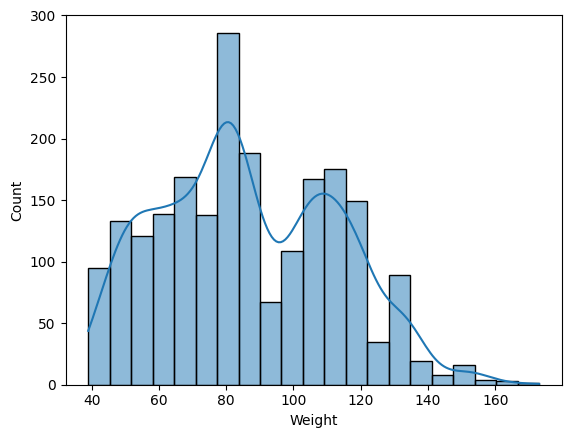

In [ ]:
sns.histplot(data=data, x='Weight', kde=True)
plt.show()

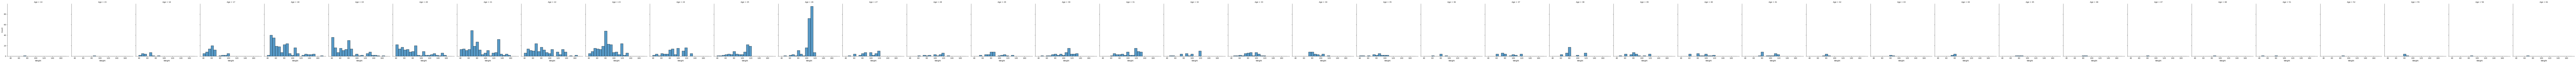

In [ ]:
sns.displot(data=data, x="Weight", col="Age")

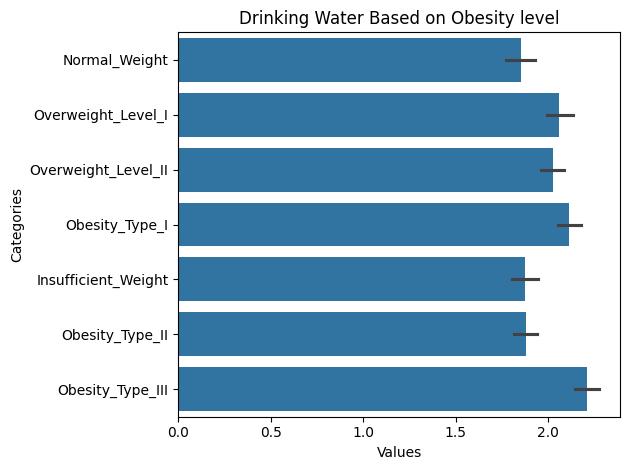

In [ ]:
categories = data['NObeyesdad']
values = data['CH2O']

sns.barplot(x=values, y=categories)

plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Drinking Water Based on Obesity level')

plt.tight_layout()
plt.show()

In [ ]:
categories = data['NObeyesdad']
values =   data['TUE']
df = pd.DataFrame({'Categories': categories, 'Values': values})
df['Group'] = df.index
df_grouped = df.groupby('Group', as_index=False).agg({'Values': 'sum', 'Categories': 'first'})
fig = px.bar(df_grouped, x='Categories', y='Values', labels={'Categories': 'Grouped Categories', 'Values': 'Total Values'}, title='Contrast Obesity level based on time spent using technology')
fig.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
<ipython-input-186-0469fa3e622d>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-186-0469fa3e622d>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


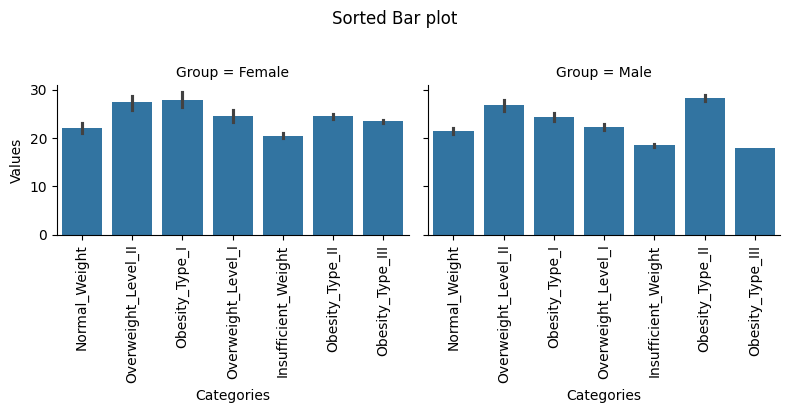

In [186]:
categories = data['NObeyesdad']
values = data['Age']
groups = data['Gender']


df = pd.DataFrame({'Categories': categories, 'Values': values, 'Group': groups})

g = sns.FacetGrid(df, col='Group', col_wrap=2, height=4)
g.map(sns.barplot, 'Categories', 'Values')

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.set_axis_labels('Categories', 'Values')
g.fig.suptitle('Sorted Bar plot', y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = []

for i in data.columns :
  if data[i].dtypes == 'int64' or data[i].dtypes == 'float64' :
    numerical_cols.append(i)

numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
categorical_cols = []
for i in data.columns :
  if data[i].dtype == 'object' :
    categorical_cols.append(i)
categorical_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df = data
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                           index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

print(corr_matrix)

                                  Gender  family_history_with_overweight  \
Gender                          0.999052                        0.098942   
family_history_with_overweight  0.098942                        0.998411   
FAVC                            0.059618                        0.205016   
CAEC                            0.130774                        0.349246   
SMOKE                           0.035201                        0.000000   
SCC                             0.097993                        0.181217   
CALC                            0.033173                        0.012013   
MTRANS                          0.161781                        0.117984   
NObeyesdad                      0.555773                        0.540307   

                                    FAVC      CAEC     SMOKE       SCC  \
Gender                          0.059618  0.130774  0.035201  0.097993   
family_history_with_overweight  0.205016  0.349246  0.000000  0.181217   
FAVC             

In [ ]:
from scipy.stats import pointbiserialr, spearmanr

corr_matrix = data

for col1 in numerical_cols + categorical_cols:
    for col2 in numerical_cols + categorical_cols:
        if col1 in numerical_cols and col2 in numerical_cols:
            corr_matrix.loc[col1, col2] = data[col1].corr(data[col2])
        elif col1 in numerical_cols and col2 in categorical_cols:
            corr_matrix.loc[col1, col2] = pointbiserialr(data[col1], pd.factorize(data[col2])[0])[0]
        elif col1 in categorical_cols and col2 in categorical_cols:
            corr_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
print(corr_matrix)

              Gender   Age  Height  Weight family_history_with_overweight  \
0             Female  21.0    1.62    64.0                            yes   
1             Female  21.0    1.52    56.0                            yes   
2               Male  23.0    1.80    77.0                            yes   
3               Male  27.0    1.80    87.0                             no   
4               Male  22.0    1.78    89.8                             no   
...              ...   ...     ...     ...                            ...   
SMOKE       0.960603   NaN     NaN     NaN                       0.960534   
SCC         0.963771   NaN     NaN     NaN                        0.96466   
CALC        0.965443   NaN     NaN     NaN                        0.96541   
MTRANS      0.968179   NaN     NaN     NaN                        0.96778   
NObeyesdad  0.978165   NaN     NaN     NaN                       0.977652   

                FAVC  FCVC  NCP       CAEC     SMOKE  CH2O       SCC  FAF  

<Figure size 2000x1400 with 0 Axes>

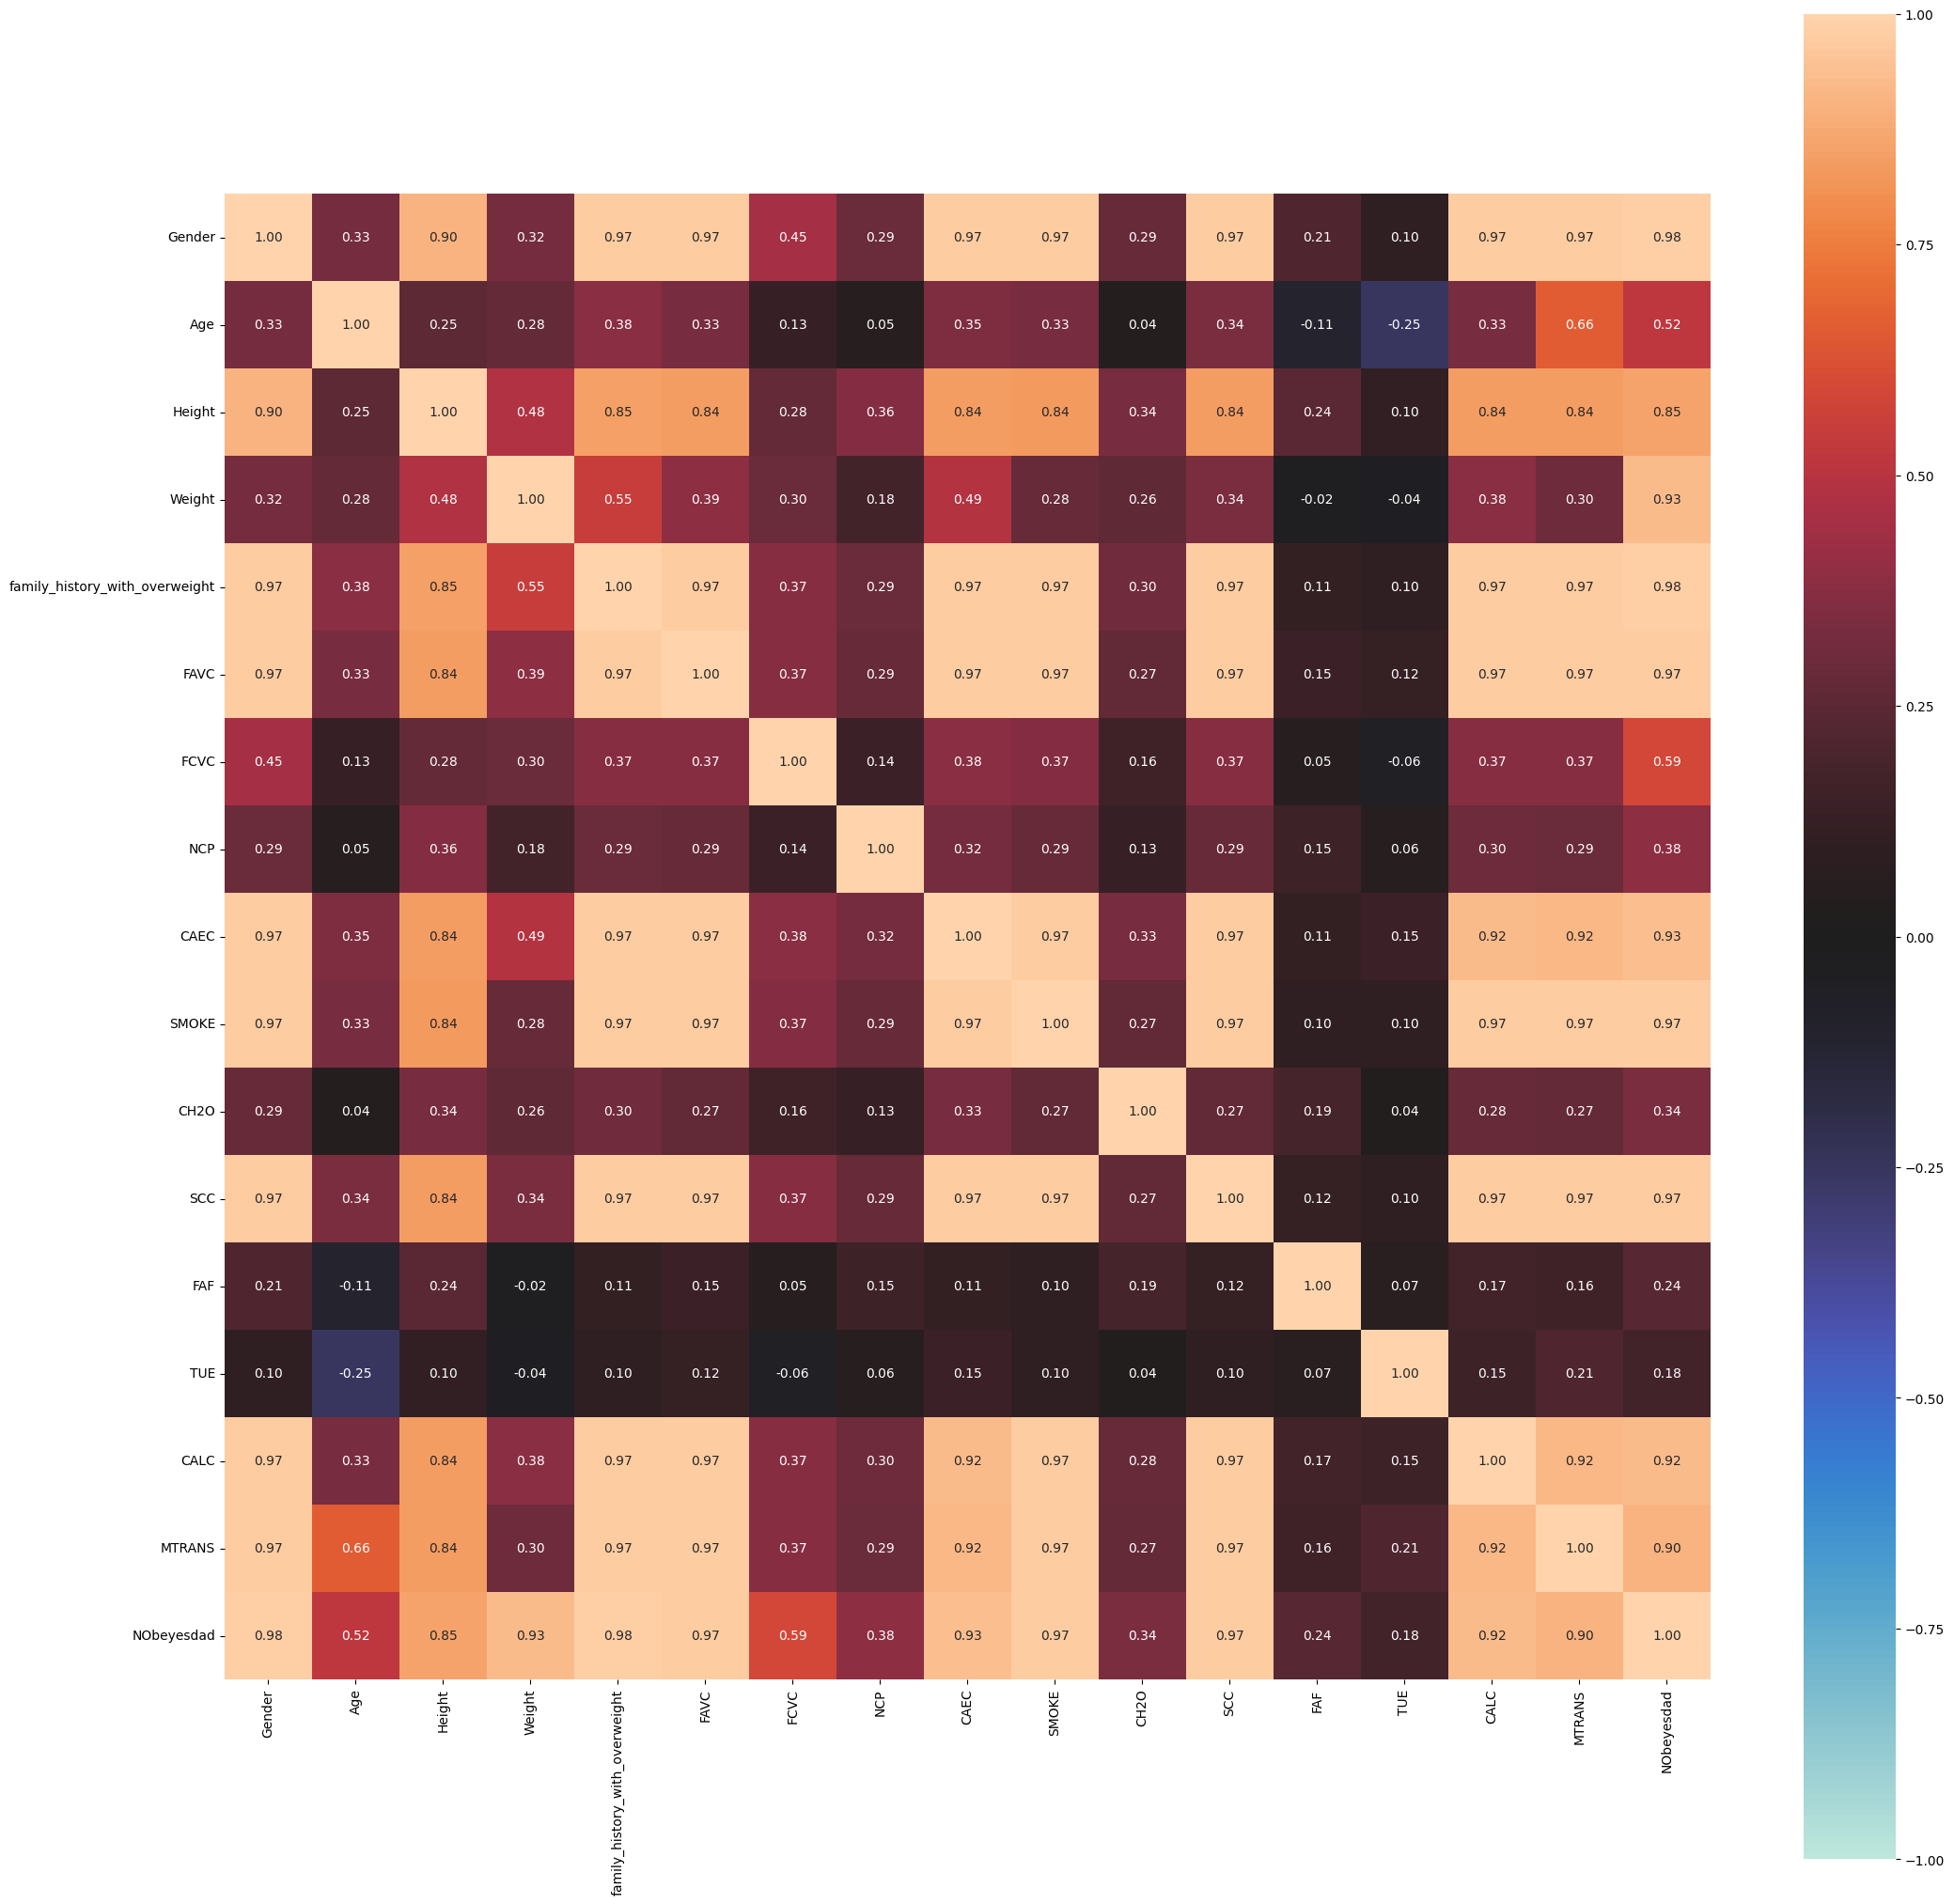

<Figure size 2000x1400 with 0 Axes>

In [ ]:
correlation_matrix = associations(data, plot=False)['corr']
plt.figure(figsize=(20, 14))

## Data Processing

In [132]:
data = data.dropna()

In [171]:
cat_attr = []
for i in data.columns :
  if data[i].dtype == 'object':
    cat_attr.append(i)
cat_attr

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [172]:
cat_attr.remove('NObeyesdad')

In [173]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [174]:
cat_attr

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [175]:
data_dummy = pd.get_dummies(data , columns=cat_attr)

In [176]:
data_dummy

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False


In [177]:
LabelEnc = LabelEncoder()
data_dummy['NObeyesdad'] = LabelEnc.fit_transform(data_dummy['NObeyesdad'])

In [178]:
X = data_dummy.loc[: , data_dummy.columns != 'NObeyesdad']
y = data_dummy['NObeyesdad']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

## Model Evaluation

In [141]:
models = {
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier( n_estimators=300,learning_rate=0.05,max_depth=6,num_leaves=50,min_data_in_leaf=5,force_col_wise=True,verbose=-1),
    "SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, max_iter=1000, tol=1e-3),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, criterion="gini", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, min_samples_split=5),
}

In [152]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test , y_pred , average='weighted')
    recall = recall_score(y_test , y_pred , average='weighted')
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1 , "Precision" : precision , "Recall" : recall})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:13:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Report

In [154]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall
0,XGBoost,0.971631,0.971561,0.972307,0.971631
1,LightGBM,0.971631,0.971577,0.972170,0.971631
5,Gradient Boosting,0.966903,0.966806,0.967834,0.966903
3,Random Forest,0.938534,0.938636,0.939705,0.938534
4,Decision Tree,0.893617,0.892885,0.897375,0.893617
2,SGD Classifier,0.581560,0.554125,0.610295,0.581560


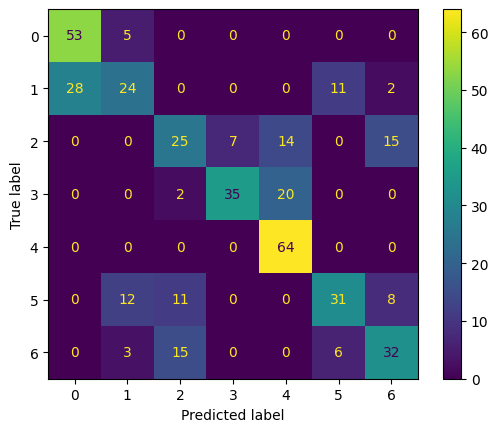

In [185]:
def ConfusionMatrix(model , X_train , X_test , y_train  , y_test):
  clf = model(random_state=0)
  clf.fit(X_train, y_train)
  SVC(random_state=0)
  predictions = clf.predict(X_test)
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  plt.show()

ConfusionMatrix(SVC , X_train , X_test , y_train , y_test)